In [1]:
# Steps to create a number by drawing on the canvas
# 1. Create a canvas
# 2. Draw on the canvas
# 3. Extract the number from the image
# 4. Plot the number in MNIST format

# 1. Create a Canvas

In [2]:
# Imports

import tkinter as tk
from PIL import Image, ImageGrab
import numpy as np

In [3]:
# Create a canvas

root = tk.Tk() # Create a root window
canvas = tk.Canvas(root, width=400, height=400, bg='white') # Create a canvas 
canvas.pack() # Pack the canvas into the root window
root.mainloop() # run the root window

# 2. Draw on the Canvas

In [4]:
# Draw on the canvas with a mouse
root = tk.Tk()
canvas = tk.Canvas(root, width=280, height=280, bg='black')
canvas.pack()

def draw(event): # draw on the canvas
    x1, y1 = (event.x - 5), (event.y - 5) 
    # event.x and event.y are the coordinates of the mouse
    x2, y2 = (event.x + 5), (event.y + 5) 
    # the number increase the size of the brush
    canvas.create_oval(
        x1, y1, x2, y2, fill='white', 
        outline='white', 
        width=7
        ) # create a black circle

canvas.bind("<B1-Motion>", draw) # bind the mouse to the canvas
root.mainloop() # run the root window


# 3. Convert image into an array

In [5]:
# Imports

import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np

In [6]:

class App(tk.Tk):
    def __init__(self):
        super().__init__()
        self.canvas = tk.Canvas(self, width=200, height=200, bg='white')
        self.canvas.pack()
        self.image1 = Image.new("L", (200, 200), 'white')
        self.draw = ImageDraw.Draw(self.image1)
        self.canvas.bind("<B1-Motion>", self.paint)
        self.button = tk.Button(self, text='Submit', command=self.on_submit)
        self.button.pack()
        self.img = None  # Instance attribute to store the image array

    def paint(self, event):
        x1, y1 = (event.x - 1), (event.y - 10)
        x2, y2 = (event.x + 1), (event.y + 1)
        self.canvas.create_oval(x1, y1, x2, y2, fill="black", width=10)
        self.draw.line([x1, y1, x2, y2], fill="black", width=10)

    def on_submit(self):
        self.get_array()
        self.destroy()  # Close the window properly

    def get_array(self):
        self.image1 = self.image1.resize((28, 28))
        self.img = np.array(self.image1)  # Store the image array in the instance attribute
        self.img = 255 - self.img
       # print(self.img)

# Instantiate and run the app
app = App()
app.mainloop()

# Access the image array after the Tkinter main loop ends
new_img = app.img
# print("Image array outside the function:", new_img)


# Plot the number in MNIST format

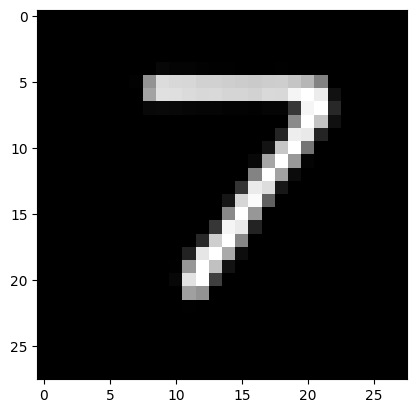

In [7]:
import matplotlib.pyplot as plt

plt.imshow(new_img, cmap='gray')
plt.show()

# Looking good!